In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
data=pd.read_csv(r"C:\Users\rvidivada\Downloads\US_Regional_Sales_Data.csv")
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [17]:
data.shape

(7991, 16)

In [18]:
data.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price'],
      dtype='object')

In [19]:
def summary(data):
    print(f'data shape:{data.shape}')
    sum=pd.DataFrame(data.dtypes,columns=['data type'])
    sum['Missing Values'] = data.isnull().sum()
    sum['%Missing Values'] = (data.isnull().sum()/len(data))*100
    sum['unique']=data.nunique().values
    desc=pd.DataFrame(data.describe(include='all').T)
    sum['Min']=desc['min'].values
    sum['Max']=desc['max'].values
    sum['first value']=data.loc[0].values
    sum['second value']=data.loc[1].values
    sum['third value'] = data.loc[2].values
    
    return sum

In [20]:
summary(data)

data shape:(7991, 16)


,data type,Missing Values,%Missing Values,unique,Min,Max,first value,second value,third value
OrderNumber,object,0,0.0,7991,NaN,NaN,SO - 000101,SO - 000102,SO - 000103
Sales Channel,object,0,0.0,4,NaN,NaN,In-Store,Online,Distributor
WarehouseCode,object,0,0.0,6,NaN,NaN,WARE-UHY1004,WARE-NMK1003,WARE-UHY1004
ProcuredDate,object,0,0.0,11,NaN,NaN,31/12/17,31/12/17,31/12/17
OrderDate,object,0,0.0,945,NaN,NaN,31/5/18,31/5/18,31/5/18
ShipDate,object,0,0.0,966,NaN,NaN,14/6/18,22/6/18,21/6/18
DeliveryDate,object,0,0.0,966,NaN,NaN,19/6/18,2/7/18,1/7/18
CurrencyCode,object,0,0.0,1,NaN,NaN,USD,USD,USD
_SalesTeamID,int64,0,0.0,28,1.0,28.0,6,14,21
_CustomerID,int64,0,0.0,50,1.0,50.0,15,20,16


In [21]:
data.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

In [22]:
data= data.drop(columns='OrderNumber')

data= data.drop(columns='CurrencyCode')

data

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,21,16,213,16,1,0.050,781.22,"1,775.50"
3,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,9,41,339,29,1,0.075,121.94,234.5
7987,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,20,42,112,36,8,0.100,804,"1,072.00"


In [23]:
df=data.copy()
df

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,21,16,213,16,1,0.050,781.22,"1,775.50"
3,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,9,41,339,29,1,0.075,121.94,234.5
7987,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,20,42,112,36,8,0.100,804,"1,072.00"


In [25]:
#Coverting dates into numerical

df['ProcuredDate']=df['ProcuredDate'].astype(str)
df['ProcuredDate']=df['ProcuredDate'].replace('[/-]','',regex=True).astype(int)

df['OrderDate'] = df['OrderDate'].astype(str)
df['OrderDate'] = df['OrderDate'].replace('[/-]','',regex=True).astype(int)

df['ShipDate'] = df['ShipDate'].astype(str)
df['ShipDate'] = df['ShipDate'].replace('[/-]','',regex=True).astype(int)

df['DeliveryDate'] = df['DeliveryDate'].astype(str)
df['DeliveryDate'] = df['DeliveryDate'].replace('[/-]','',regex=True).astype(int)

In [26]:
df

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,311217,31518,14618,19618,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,Online,WARE-NMK1003,311217,31518,22618,2718,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,Distributor,WARE-UHY1004,311217,31518,21618,1718,21,16,213,16,1,0.050,781.22,"1,775.50"
3,Wholesale,WARE-NMK1003,311217,31518,2618,7618,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,Distributor,WARE-NMK1003,10418,31518,16618,26618,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,26920,301220,7121,14121,9,41,339,29,1,0.075,121.94,234.5
7987,Online,WARE-NMK1003,26920,301220,2121,4121,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,Online,WARE-UHY1004,26920,301220,23121,26121,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,Online,WARE-NMK1003,26920,301220,20121,25121,20,42,112,36,8,0.100,804,"1,072.00"


In [27]:
df.drop(columns='ProcuredDate',inplace = True)

In [28]:
df['Unit Cost'] = df['Unit Cost'].replace(',','')

df['Unit Price'] = df['Unit Price'].replace(',','')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales Channel     7991 non-null   object 
 1   WarehouseCode     7991 non-null   object 
 2   OrderDate         7991 non-null   int32  
 3   ShipDate          7991 non-null   int32  
 4   DeliveryDate      7991 non-null   int32  
 5   _SalesTeamID      7991 non-null   int64  
 6   _CustomerID       7991 non-null   int64  
 7   _StoreID          7991 non-null   int64  
 8   _ProductID        7991 non-null   int64  
 9   Order Quantity    7991 non-null   int64  
 10  Discount Applied  7991 non-null   float64
 11  Unit Cost         7991 non-null   object 
 12  Unit Price        7991 non-null   object 
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 718.1+ KB


In [53]:
df['Unit Cost'] = df['Unit Cost'].str.replace(',', '')
df['Unit Cost'] = pd.to_numeric(df['Unit Cost'])

df['Unit Price'] = df['Unit Price'].str.replace(',', '')
df['Unit Price'] = pd.to_numeric(df['Unit Price'])

In [54]:
df

,Sales Channel,WarehouseCode,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,31518,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1
1,Online,WARE-NMK1003,31518,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6
2,Distributor,WARE-UHY1004,31518,21618,1718,21,16,213,16,1,0.050,781.22,1775.5
3,Wholesale,WARE-NMK1003,31518,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9
4,Distributor,WARE-NMK1003,31518,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,301220,7121,14121,9,41,339,29,1,0.075,121.94,234.5
7987,Online,WARE-NMK1003,301220,2121,4121,14,29,202,3,6,0.050,1921.56,3202.6
7988,Online,WARE-UHY1004,301220,23121,26121,14,32,241,35,5,0.200,2792.76,3825.7
7989,Online,WARE-NMK1003,301220,20121,25121,20,42,112,36,8,0.100,804.00,1072.0


In [55]:
df.dtypes

Sales Channel        object
WarehouseCode        object
OrderDate             int32
ShipDate              int32
DeliveryDate          int32
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Cost           float64
Unit Price          float64
dtype: object

In [56]:
numerical_features = df.select_dtypes(include =['int','float']).columns

categorical_features = df.select_dtypes(include=['object']).columns

In [57]:
print('Numerical_Columns:', numerical_features)

print('Categorical_Columns:', categorical_features)

Numerical_Columns: Index(['OrderDate', 'ShipDate', 'DeliveryDate', '_SalesTeamID', '_CustomerID',
       '_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied',
       'Unit Cost', 'Unit Price'],
      dtype='object')
Categorical_Columns: Index(['Sales Channel', 'WarehouseCode'], dtype='object')


In [58]:
numerical_data = df[numerical_features]
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderDate,7991.0,58852.886748,82346.017960,1119.00,11420.00,21720.000,51069.00,311219.00
ShipDate,7991.0,57129.123514,80434.397914,1119.00,11420.00,21220.000,41218.00,311220.00
DeliveryDate,7991.0,57233.706295,80403.804924,1119.00,11619.50,21420.000,41219.00,311220.00
_SalesTeamID,7991.0,14.384307,7.986086,1.00,8.00,14.000,21.00,28.00
_CustomerID,7991.0,25.457014,14.414883,1.00,13.00,25.000,38.00,50.00
_StoreID,7991.0,183.850081,105.903946,1.00,91.00,183.000,276.00,367.00
_ProductID,7991.0,23.771743,13.526545,1.00,12.00,24.000,36.00,47.00
Order Quantity,7991.0,4.525341,2.312631,1.00,3.00,5.000,7.00,8.00
Discount Applied,7991.0,0.114394,0.085570,0.05,0.05,0.075,0.15,0.40
Unit Cost,7991.0,1431.911513,1112.413063,68.68,606.12,1080.580,2040.25,5498.56


In [59]:
categorical_data = df[categorical_features]
categorical_counts = categorical_data.nunique()

categorical_counts

Sales Channel    4
WarehouseCode    6
dtype: int64

In [61]:
for i in categorical_data:
    print(i)
    print(categorical_data[i].unique())

Sales Channel
['In-Store' 'Online' 'Distributor' 'Wholesale']
WarehouseCode
['WARE-UHY1004' 'WARE-NMK1003' 'WARE-PUJ1005' 'WARE-XYS1001'
 'WARE-MKL1006' 'WARE-NBV1002']


In [62]:
#Total sales for each order

df['Total Sales'] = df['Order Quantity'] * df['Unit Price']
df.head()

,Sales Channel,WarehouseCode,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Sales
0,In-Store,WARE-UHY1004,31518,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1,9815.5
1,Online,WARE-NMK1003,31518,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6,11818.8
2,Distributor,WARE-UHY1004,31518,21618,1718,21,16,213,16,1,0.050,781.22,1775.5,1775.5
3,Wholesale,WARE-NMK1003,31518,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9,18599.2
4,Distributor,WARE-NMK1003,31518,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4,14579.2


Text(0.5, 1.0, 'Top 10 Products by Total Sales')

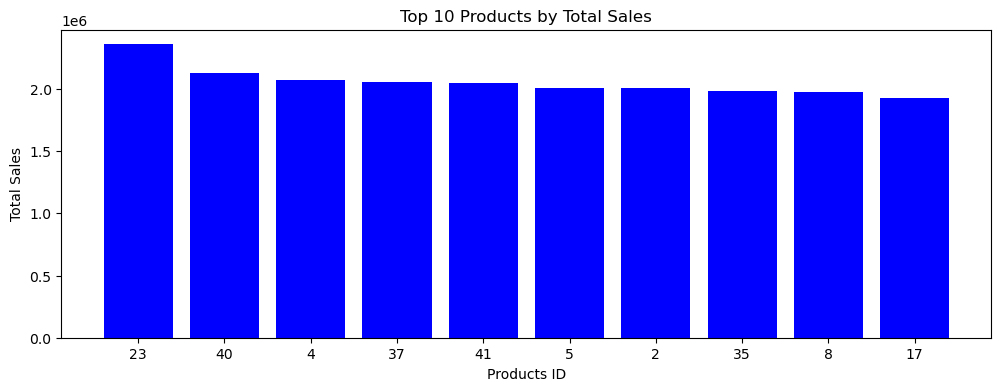

In [63]:
#Aggregate total sales by ProductID
product_sales_data = df.groupby('_ProductID')['Total Sales'].sum().reset_index()

#sort the products by total sales and pick the top 10
top_products = product_sales_data.sort_values(by='Total Sales', ascending = False).head(10)

#plotting a top 10 products by sales
plt.figure(figsize=(12,4))
plt.bar(top_products['_ProductID'].astype(str),top_products['Total Sales'],color='blue')
plt.xlabel('Products ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Total Sales')

In [64]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['OrderDate_Year'] = df['OrderDate'].dt.year
df['OrderDate_Month'] = df['OrderDate'].dt.month
df['OrderDate_Day'] = df['OrderDate'].dt.day
df.head()

,Sales Channel,WarehouseCode,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Sales,OrderDate_Year,OrderDate_Month,OrderDate_Day
0,In-Store,WARE-UHY1004,1970-01-01 00:00:00.000031518,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1,9815.5,1970,1,1
1,Online,WARE-NMK1003,1970-01-01 00:00:00.000031518,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6,11818.8,1970,1,1
2,Distributor,WARE-UHY1004,1970-01-01 00:00:00.000031518,21618,1718,21,16,213,16,1,0.050,781.22,1775.5,1775.5,1970,1,1
3,Wholesale,WARE-NMK1003,1970-01-01 00:00:00.000031518,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9,18599.2,1970,1,1
4,Distributor,WARE-NMK1003,1970-01-01 00:00:00.000031518,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4,14579.2,1970,1,1


In [65]:
grouped_year_unit_price = df[['Sales Channel','OrderDate_Year','Unit Price']].groupby(['Sales Channel','OrderDate_Year']).sum()
grouped_year_unit_price

,,Unit Price
Sales Channel,OrderDate_Year,
Distributor,1970,3201762.5
In-Store,1970,7487169.6
Online,1970,5544846.3
Wholesale,1970,2021952.8


In [70]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [71]:
features_with_multiple_categorical = ['Sales Channel','WarehouseCode']
features_with_multiple_categorical

['Sales Channel', 'WarehouseCode']

In [72]:
#Create an instance of LabelEncoder
encoder = LabelEncoder()
encoder

LabelEncoder()

In [73]:
for i in features_with_multiple_categorical:
    df[i] = encoder.fit_transform(categorical_data[i])
    
df.head()    

,Sales Channel,WarehouseCode,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Sales,OrderDate_Year,OrderDate_Month,OrderDate_Day
0,1,4,1970-01-01 00:00:00.000031518,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1,9815.5,1970,1,1
1,2,2,1970-01-01 00:00:00.000031518,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6,11818.8,1970,1,1
2,0,4,1970-01-01 00:00:00.000031518,21618,1718,21,16,213,16,1,0.050,781.22,1775.5,1775.5,1970,1,1
3,3,2,1970-01-01 00:00:00.000031518,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9,18599.2,1970,1,1
4,0,2,1970-01-01 00:00:00.000031518,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4,14579.2,1970,1,1


In [74]:
df['OrderDate']=pd.to_numeric(df['OrderDate'])
df

,Sales Channel,WarehouseCode,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Sales,OrderDate_Year,OrderDate_Month,OrderDate_Day
0,1,4,31518,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1,9815.5,1970,1,1
1,2,2,31518,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6,11818.8,1970,1,1
2,0,4,31518,21618,1718,21,16,213,16,1,0.050,781.22,1775.5,1775.5,1970,1,1
3,3,2,31518,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9,18599.2,1970,1,1
4,0,2,31518,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4,14579.2,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,1,0,301220,7121,14121,9,41,339,29,1,0.075,121.94,234.5,234.5,1970,1,1
7987,2,2,301220,2121,4121,14,29,202,3,6,0.050,1921.56,3202.6,19215.6,1970,1,1
7988,2,4,301220,23121,26121,14,32,241,35,5,0.200,2792.76,3825.7,19128.5,1970,1,1
7989,2,2,301220,20121,25121,20,42,112,36,8,0.100,804.00,1072.0,8576.0,1970,1,1


In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

In [76]:
#splitting training and testing data
X=df.drop(columns='Unit Price')
Y=df['Unit Price']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5593, 16), (2398, 16), (5593,), (2398,))

In [80]:
#Predicting model using linear regression

lm=LinearRegression()
lm.fit(X_train,Y_train)
Y_predict_LR = lm.predict(X_test)
Y_predict_LR

array([1367.22541958,  597.64551717, 2265.05445702, ..., 1523.8094173 ,
       1529.17971458,  985.14090855])

In [86]:
#Evaluate the linear regression model's performance using mean squared error and r square

mse = mean_squared_error(Y_test,Y_predict_LR)
mae = mean_absolute_error(Y_test,Y_predict_LR)
rmse = sqrt(mse)
r_square = r2_score(Y_test,Y_predict_LR)

print('Linear Regression')
print('Mean Squared Error :',round(mse,2))
print('Mean Absolute Error :',round(mae,2))
print('Root Mean Squared Error :',round(rmse,2))
print('R Square :',round(r_square,2))

Linear Regression
Mean Squared Error : 237302.0
Mean Absolute Error : 349.61
Root Mean Squared Error : 487.14
R Square : 0.92


In [87]:
#Predicting model using Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
Y_predict_dt = dt.predict(X_test)
Y_predict_dt

array([1192.6, 1018.4, 2324.9, ..., 1058.6, 1025.1,  864.3])

In [88]:
#Evaluate the Decision Tree model's performance using mean squared error and r square

mse = mean_squared_error(Y_test,Y_predict_dt)
mae = mean_absolute_error(Y_test,Y_predict_dt)
rmse = sqrt(mse)
r_square = r2_score(Y_test,Y_predict_dt)

print('Decision Tree')
print('Mean Squared Error :',round(mse,2))
print('Mean Absolute Error :',round(mae,2))
print('Root Mean Squared Error :',round(rmse,2))
print('R Square :',round(r_square,2))

Decision Tree
Mean Squared Error : 12631.82
Mean Absolute Error : 42.83
Root Mean Squared Error : 112.39
R Square : 1.0


In [90]:
#Predicting model using Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
Y_predict_rf = rf.predict(X_test)
Y_predict_rf

array([1176.185,  922.523, 2320.277, ..., 1203.856, 1046.339,  879.777])

In [94]:
#Evaluate the Random Forest model's performance using mean squared error and r square

mse = mean_squared_error(Y_test,Y_predict_rf)
mae = mean_absolute_error(Y_test,Y_predict_rf)
rmse = sqrt(mse)
r_square = r2_score(Y_test,Y_predict_rf)

print('Random Forest')
print('Mean Squared Error :',round(mse,2))
print('Mean Absolute Error :',round(mae,2))
print('Root Mean Squared Error :',round(rmse,2))
print('R Square :',round(r_square,2))

Random Forest
Mean Squared Error : 23030.03
Mean Absolute Error : 75.16
Root Mean Squared Error : 151.76
R Square : 0.99


In [95]:
#Predicting model using KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,Y_train)
Y_predict_knn = knn.predict(X_test)
Y_predict_knn

array([1273.  , 1053.24, 2996.24, ..., 1090.76,  765.14, 1920.22])

In [96]:
#Evaluate the Random Forest model's performance using mean squared error and r square

mse = mean_squared_error(Y_test,Y_predict_knn)
mae = mean_absolute_error(Y_test,Y_predict_knn)
rmse = sqrt(mse)
r_square = r2_score(Y_test,Y_predict_knn)

print('KNearest Neighnors')
print('Mean Squared Error :',round(mse,2))
print('Mean Absolute Error :',round(mae,2))
print('Root Mean Squared Error :',round(rmse,2))
print('R Square :',round(r_square,2))

KNearest Neighnors
Mean Squared Error : 1392254.88
Mean Absolute Error : 880.84
Root Mean Squared Error : 1179.94
R Square : 0.52


In [98]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train,Y_train)
Y_predict_ada = ada.predict(X_test)
Y_predict_ada

array([1582.32233503, 1029.22307692, 2191.46737235, ..., 1582.32233503,
       1235.86879562, 1058.1       ])

In [99]:
#Evaluate the Adaboost model's performance using mean squared error and r square

mse = mean_squared_error(Y_test,Y_predict_ada)
mae = mean_absolute_error(Y_test,Y_predict_ada)
rmse = sqrt(mse)
r_square = r2_score(Y_test,Y_predict_ada)

print('AdaBoost')
print('Mean Squared Error :',round(mse,2))
print('Mean Absolute Error :',round(mae,2))
print('Root Mean Squared Error :',round(rmse,2))
print('R Square :',round(r_square,2))

AdaBoost
Mean Squared Error : 284706.0
Mean Absolute Error : 411.11
Root Mean Squared Error : 533.58
R Square : 0.9
